In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import pickle
import os

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_6_WT_250k_CS3.csv"
df = pd.read_csv(path)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [13]:
df.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,2,360.0,24,362.0,2.0,1.18,433,100.0,99.7,362.0,364.0
1,0.2,2,2,3,795.0,53,796.0,1.0,0.33,306,100.0,99.9,796.0,797.0
2,0.3,3,3,1,1102.0,73,1103.0,1.0,0.29,922,100.0,99.9,1103.0,1104.0
3,1.1,1,1,3,801.0,53,811.0,10.0,5.54,100,100.0,98.6,811.0,828.0
4,1.2,2,3,1,911.0,61,923.0,12.0,6.63,1070,100.0,98.4,923.0,943.0


In [14]:
df["Arrival_t"] = df["Arrival"].apply(lambda x: int(round(x/15)))

In [15]:
driving = [0 for i in range(97)]
at_home = [0 for i in range(97)]
at_work = [0 for i in range(97)]
at_shopping = [0 for i in range(97)]
at_recreational = [0 for i in range(97)]
at_other = [0 for i in range(97)]

states = [driving, at_home, at_work, at_shopping, at_recreational, at_other]

In [16]:
df.head(50)

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end,Arrival_t
0,0.1,1,1,2,360.0,24,362.0,2.0,1.18,433,100.0,99.7,362.0,364.0,24
1,0.2,2,2,3,795.0,53,796.0,1.0,0.33,306,100.0,99.9,796.0,797.0,53
2,0.3,3,3,1,1102.0,73,1103.0,1.0,0.29,922,100.0,99.9,1103.0,1104.0,74
3,1.1,1,1,3,801.0,53,811.0,10.0,5.54,100,100.0,98.6,811.0,828.0,54
4,1.2,2,3,1,911.0,61,923.0,12.0,6.63,1070,100.0,98.4,923.0,943.0,62
5,2.1,1,1,3,421.0,28,442.0,21.0,11.74,31,100.0,97.2,442.0,470.0,29
6,2.2,2,3,2,473.0,32,510.0,37.0,21.31,530,100.0,94.9,510.0,560.0,34
7,2.3,3,2,1,1040.0,69,1087.0,47.0,26.63,787,100.0,93.6,1087.0,1150.0,72
8,3.1,1,1,2,438.0,29,464.0,26.0,14.96,669,100.0,90.1,464.0,504.0,31
9,3.2,2,2,1,1133.0,76,1160.0,27.0,15.28,200,100.0,89.9,1160.0,1201.0,77


In [17]:
# iterieren durch alle Zeilen
rows = df.shape[0]
for i in range (rows-1):
    
    # ZUHAUSE BIS ERSTER TRIP 
    if df.at[i,"Trip_no"] == 1:
        # Fahrzeug zuhause bis zum Zeitpunkt der ersten Abfahrt
        whyfrom = df.at[i, "Whyfrom"]
        for j in range(df.at[i, "Departure_t"]):
            states[whyfrom][j] += 1
    
    # FAHRZUSTAND DEPARTURE - ARRIVAL
    # Fahrzeug im Fahrzustand bis zur Ankunft am Ziel
    for j in range(df.at[i, "Departure_t"], df.at[i, "Arrival_t"]):
        states[0][j] += 1
    
    whyto = df.at[i, "Whyto"]
    # ANKUNFT BIS NÄCHSTER TAG ODER ABFAHRT NÄCHSTER TRIP 
    # wenn letzter Trip der Person: Aufenthalt bis zum nächsten Morgen am Zielzustand
    if df.at[i+1,"Trip_no"] == 1:
        for j in range(df.at[i, "Arrival_t"], 97):
            states[whyto][j] +=1
    else:
        for j in range(df.at[i, "Arrival_t"], df.at[i+1, "Departure_t"]):
            states[whyto][j] +=1     
        
            
                

In [18]:
for i in range(97): 
    print ((states[0][i] + states[1][i] + states[2][i] + states[3][i] + states[4][i] + states[5][i])/250000)

1.009244
1.020448
1.026524
1.030428
1.032768
1.034504
1.0357
1.03664
1.037352
1.037952
1.038428
1.038788
1.03908
1.039308
1.03952
1.039712
1.039876
1.039968
1.040052
1.04014
1.040228
1.04028
1.040344
1.040384
1.040416
1.040436
1.040436
1.040452
1.040484
1.040492
1.040504
1.040508
1.040516
1.040516
1.040528
1.040528
1.040528
1.040544
1.04054
1.04054
1.04054
1.04054
1.040544
1.040544
1.040536
1.040536
1.040536
1.040536
1.040536
1.040536
1.040532
1.040524
1.040524
1.040528
1.04052
1.040512
1.040504
1.040488
1.040472
1.040452
1.040444
1.04042
1.040408
1.040396
1.04036
1.040328
1.0403
1.04028
1.040252
1.040208
1.040176
1.040132
1.040088
1.04002
1.039912
1.039832
1.039752
1.039664
1.039576
1.039468
1.039316
1.039164
1.038944
1.038712
1.038452
1.038064
1.037584
1.03694
1.036244
1.0353
1.033892
1.03218
1.02986
1.026144
1.020192
1.008732
1.000008


In [19]:
x = np.linspace(0, 96, 97)

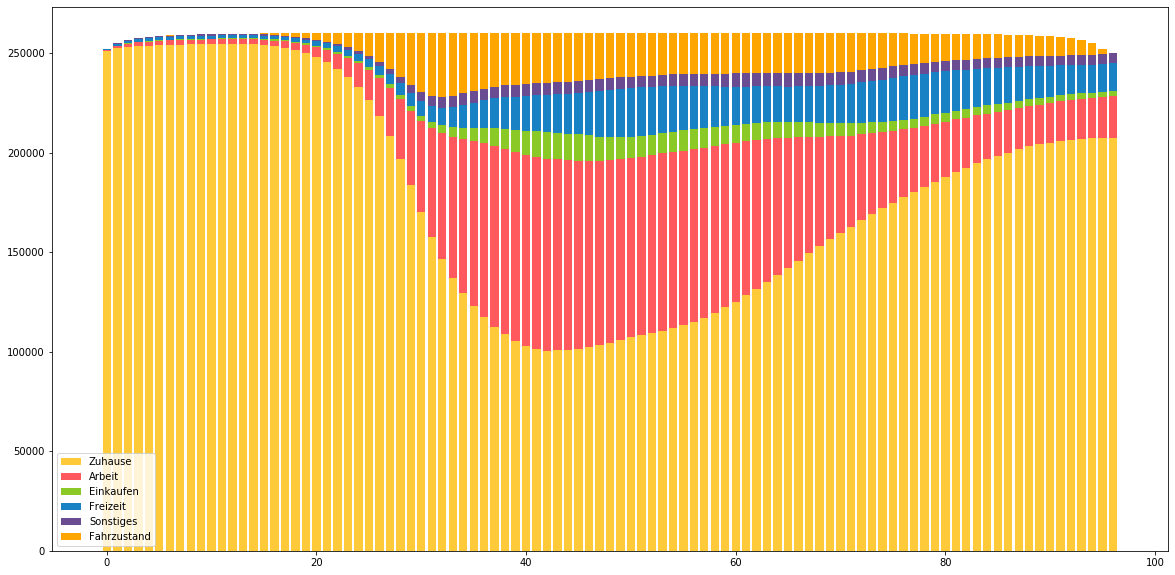

In [20]:
plt.figure(figsize=(20,10))

plt.bar(x, states[1], label="Zuhause", color='#FFCA3A' )
plt.bar(x, states[2], bottom=states[1], label="Arbeit", color='#FF595E');
plt.bar(x, states[3], bottom=[i+j for i,j in zip(states[1], states[2])], label="Einkaufen", color='#8AC926');
plt.bar(x, states[4], bottom=[i+j+k for i,j,k in zip(states[1], states[2], states[3])], label="Freizeit", color='#1982C4');
plt.bar(x, states[5], bottom=[i+j+k+l for i,j,k,l in zip(states[1], states[2], states[3], states[4])], label="Sonstiges", color='#6A4C93');
plt.bar(x, states[0], bottom=[i+j+k+l+m for i,j,k,l,m in zip(states[1], states[2], states[3], states[4], states[5])], label="Fahrzustand", color="orange");
plt.legend()
